### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import shap

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score



from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)


pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
np.set_printoptions(suppress=True)

### Data Exploration and Analysis

In [2]:
df = pd.read_csv("ht_user_metrics_lifestyle.csv")

In [3]:
df

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,Sedentary
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,Weight Trainer
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,Weight Trainer
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,Weight Trainer
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,Weight Trainer
...,...,...,...,...,...,...,...
2995,82.056086,140.614679,21.432227,24.162064,41.550757,7283.430137,Weight Trainer
2996,90.113362,144.578567,21.432304,18.346046,40.459149,7110.720548,Weight Trainer
2997,81.907737,148.378812,21.598411,22.797690,5.838148,5153.890411,Sedentary
2998,69.910868,140.814891,26.134180,26.965661,5.176265,5167.194521,Sedentary


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   avg_resting_heartrate  3000 non-null   float64
 1   avg_active_heartrate   3000 non-null   float64
 2   avg_bmi                3000 non-null   float64
 3   avg_vo2                3000 non-null   float64
 4   avg_workout_minutes    3000 non-null   float64
 5   avg_steps              3000 non-null   float64
 6   lifestyle              3000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 164.2+ KB


In [5]:
df.describe(include='all')

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,Cardio Enthusiast
freq,NaN,NaN,NaN,NaN,NaN,NaN,1064
mean,62.266620,119.975708,22.902468,32.351569,35.573140,10211.991552,NaN
std,12.521525,16.910238,4.492680,7.029757,12.472619,2985.154675,NaN
min,45.046490,82.041834,7.592313,10.934276,4.219295,5047.646575,NaN
25%,52.024483,106.580546,19.761279,27.334516,32.626821,7181.889726,NaN
50%,58.526237,117.846432,22.912607,33.212109,36.840635,10839.997260,NaN
75%,70.799247,131.758270,26.005915,37.412472,41.755371,12759.914384,NaN


In [6]:
df.shape

(3000, 7)

In [7]:
df.columns

Index(['avg_resting_heartrate', 'avg_active_heartrate', 'avg_bmi', 'avg_vo2', 'avg_workout_minutes', 'avg_steps', 'lifestyle'], dtype='object')

In [8]:
df['lifestyle_cat'] = df['lifestyle'].map({'Sedentary':0, 'Weight Trainer':1, 'Athlete':1, 'Cardio Enthusiast':1 })

In [9]:
df.head()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle,lifestyle_cat
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890,Sedentary,0
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781,Weight Trainer,1
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151,Weight Trainer,1
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411,Weight Trainer,1
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082,Weight Trainer,1


In [10]:
df.drop(['lifestyle'],axis=1,inplace=True)

### Data Visualization

### Univariate Data Exploration

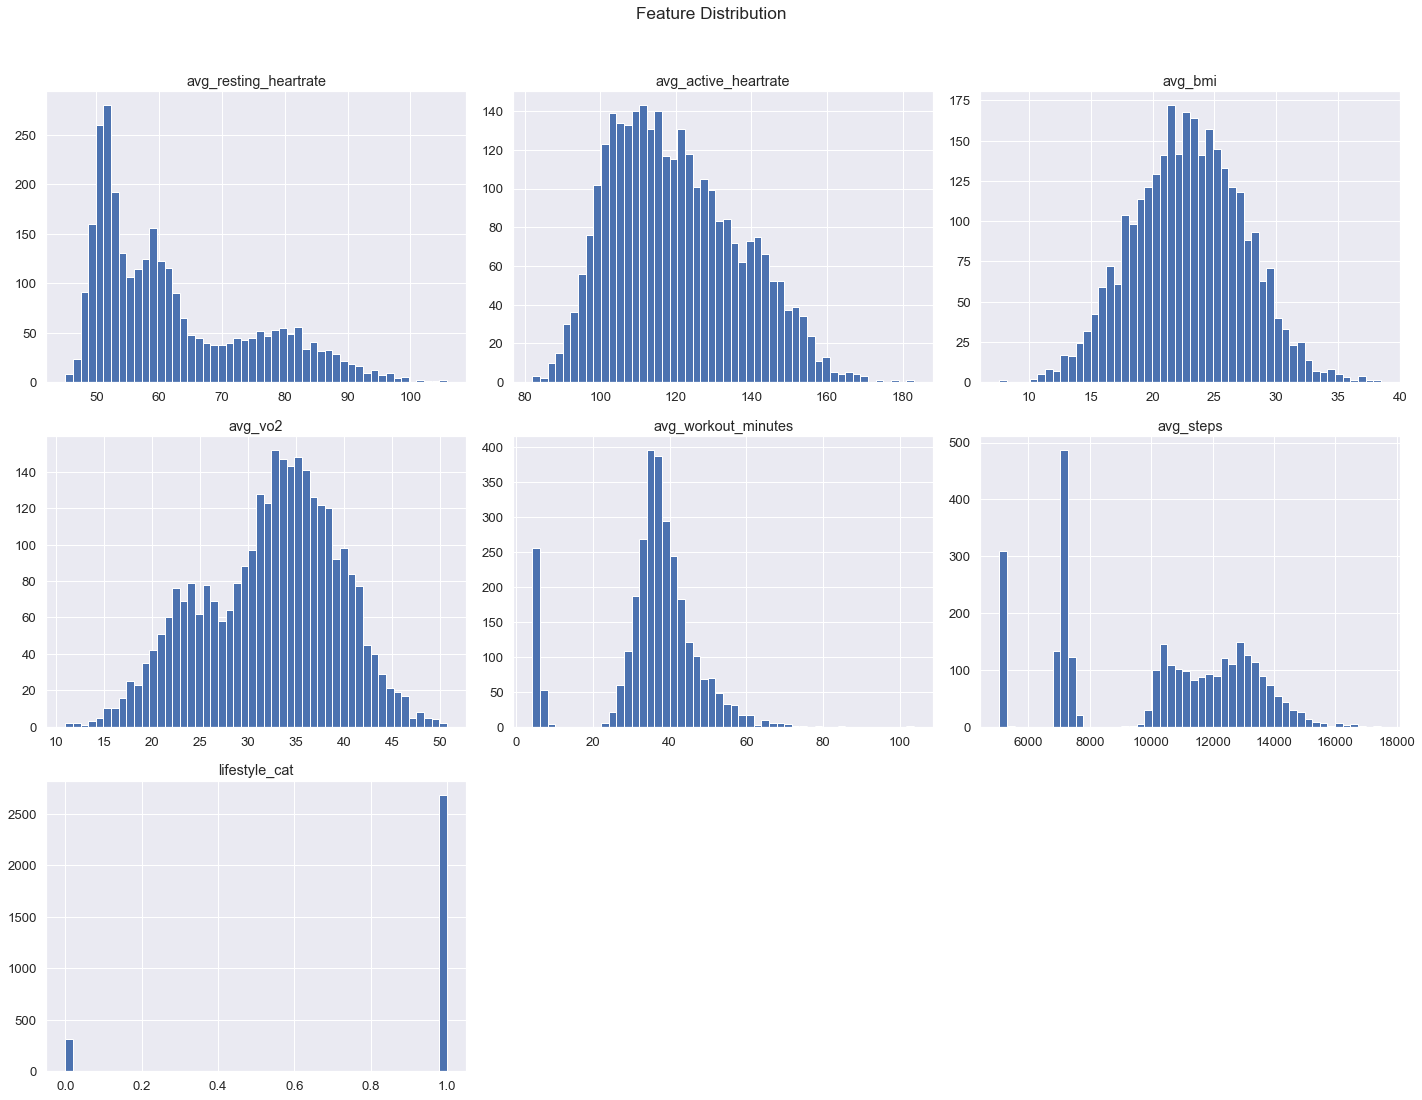

In [11]:
df.hist(bins=50, figsize=(20,15))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

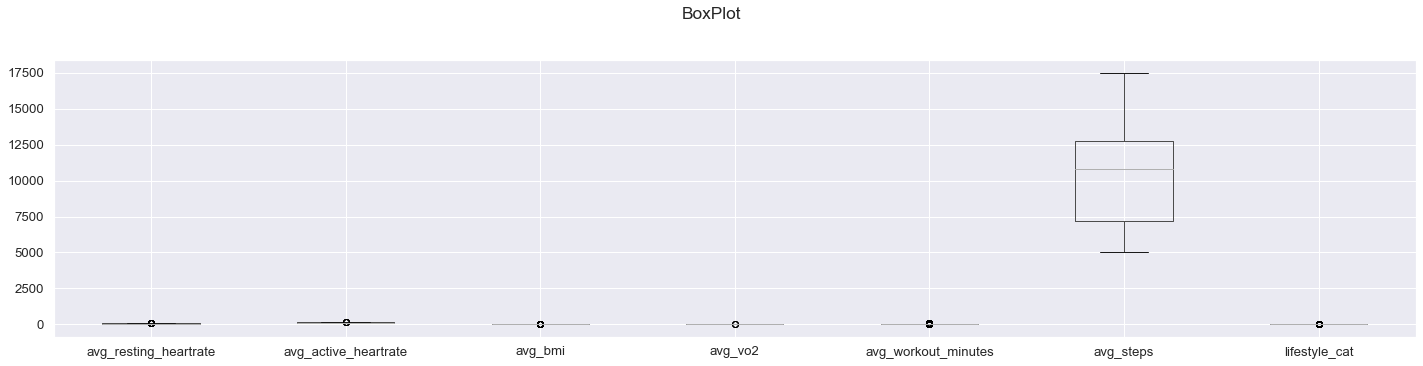

In [12]:
df.boxplot(figsize=(20,5))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

### Correlation

In [13]:
df.corr()

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps,lifestyle_cat
avg_resting_heartrate,1.000000,0.806261,0.143967,-0.941182,-0.374457,-0.789815,-0.459084
avg_active_heartrate,0.806261,1.000000,0.328879,-0.789361,-0.393310,-0.817233,-0.485789
avg_bmi,0.143967,0.328879,1.000000,-0.127956,-0.377415,-0.453897,-0.059044
avg_vo2,-0.941182,-0.789361,-0.127956,1.000000,0.306123,0.731383,0.419090
avg_workout_minutes,-0.374457,-0.393310,-0.377415,0.306123,1.000000,0.472424,0.816297
avg_steps,-0.789815,-0.817233,-0.453897,0.731383,0.472424,1.000000,0.575662
lifestyle_cat,-0.459084,-0.485789,-0.059044,0.419090,0.816297,0.575662,1.000000


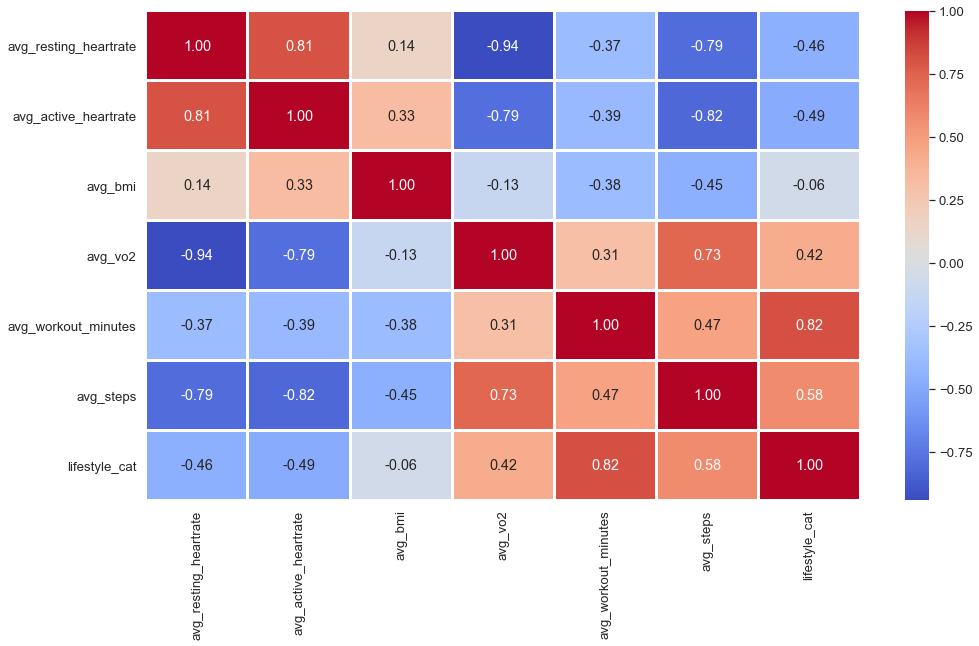

In [14]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Pairplots

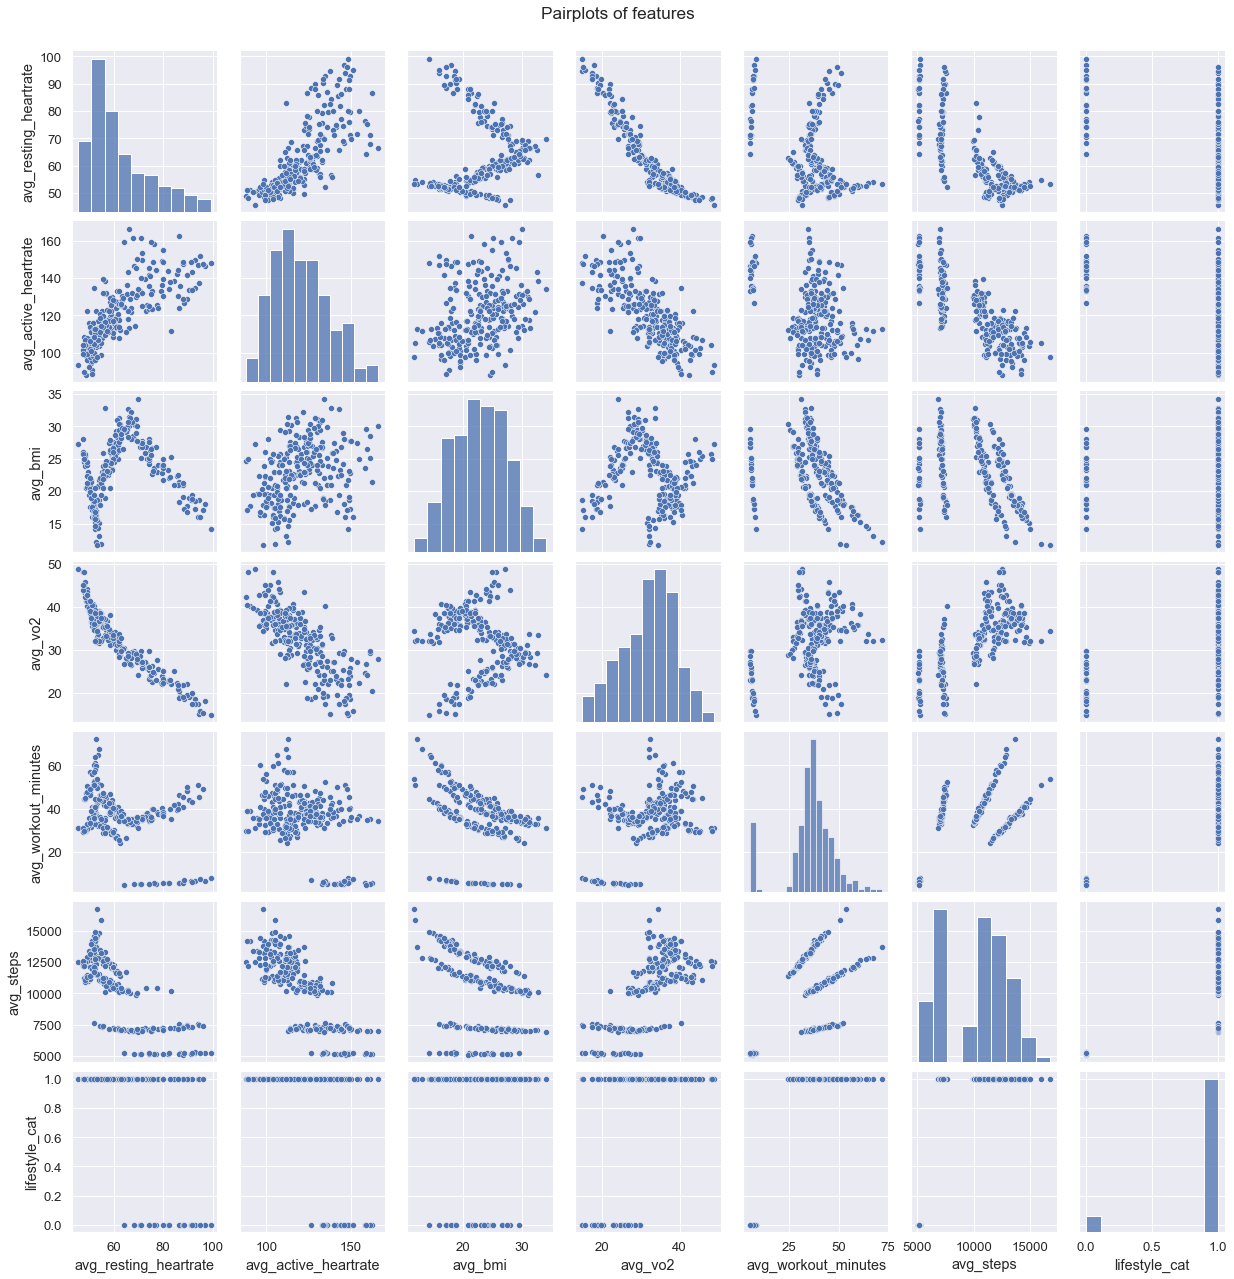

In [15]:
sns.pairplot(df.sample(250))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
plt.show()

### Data Preprocessing

### Treat Missing Values

In [16]:
df.isnull().sum()

avg_resting_heartrate    0
avg_active_heartrate     0
avg_bmi                  0
avg_vo2                  0
avg_workout_minutes      0
avg_steps                0
lifestyle_cat            0
dtype: int64

### Train Test Split

In [17]:
df.shape

(3000, 7)

In [18]:
X = df.iloc[:,0:6]
y = df.iloc[:,6]

In [19]:
X.values, y.values

(array([[  82.68379728,  139.43487473,   22.39806365,   20.99401158,
            5.50263247, 5171.49589041],
        [  77.73294229,  127.05715347,   25.15081265,   25.52747527,
           37.21670181, 7115.59178082],
        [  86.51162896,  147.31573127,   19.148256  ,   19.44840652,
           45.00008651, 7257.69315068],
        ...,
        [  81.90773695,  148.37881155,   21.59841078,   22.79769019,
            5.83814781, 5153.89041096],
        [  69.91086843,  140.81489091,   26.13418039,   26.96566092,
            5.17626546, 5167.19452055],
        [  97.98210157,  139.56732889,   15.75133025,   12.42725884,
           52.40329518, 7559.28493151]]),
 array([0, 1, 1, ..., 0, 0, 1], dtype=int64))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2250, 6), (750, 6), (2250,), (750,))

In [22]:
rf1 = RandomForestClassifier(random_state=0)

In [23]:
rf1.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [24]:
rf1pred = rf1.predict(X_test)

In [25]:
rf1.score(X_train,y_train)

1.0

In [26]:
rf1.score(X_test,y_test)

1.0

In [27]:
confusion_matrix(y_test,rf1pred)

array([[ 63,   0],
       [  0, 687]], dtype=int64)

In [28]:
rf2 = RandomForestClassifier(class_weight='balanced')
rf2.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [29]:
rf2pred = rf2.predict(X_test)

In [30]:
rf2.score(X_train,y_train)

1.0

In [31]:
rf2.score(X_test,y_test)

1.0

In [32]:
confusion_matrix(y_test,rf2pred)

array([[ 63,   0],
       [  0, 687]], dtype=int64)

### Treat Imbalance Data

In [33]:
y.value_counts()

1    2688
0     312
Name: lifestyle_cat, dtype: int64

In [34]:
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)

In [35]:
new_X, new_y = ros.fit_resample(X, y)

In [36]:
new_y.value_counts()

1    2688
0    2688
Name: lifestyle_cat, dtype: int64

In [37]:
new_X

,avg_resting_heartrate,avg_active_heartrate,avg_bmi,avg_vo2,avg_workout_minutes,avg_steps
0,82.683797,139.434875,22.398064,20.994012,5.502632,5171.495890
1,77.732942,127.057153,25.150813,25.527475,37.216702,7115.591781
2,86.511629,147.315731,19.148256,19.448407,45.000087,7257.693151
3,77.550541,129.577004,24.240376,21.401302,37.886069,7129.690411
4,68.933106,136.502687,30.726596,28.855230,32.241984,6958.378082
...,...,...,...,...,...,...
5371,69.698803,138.911372,27.961016,28.226329,4.989908,5196.517808
5372,74.793985,147.058693,27.830804,24.330143,4.903079,5174.794521
5373,69.972954,136.240389,26.832075,25.557799,5.315381,5138.800000
5374,87.702079,140.505051,20.673713,20.636949,6.009250,5222.356164


### Train Test Split

In [38]:
new_X.values, new_y.values

(array([[  82.68379728,  139.43487473,   22.39806365,   20.99401158,
            5.50263247, 5171.49589041],
        [  77.73294229,  127.05715347,   25.15081265,   25.52747527,
           37.21670181, 7115.59178082],
        [  86.51162896,  147.31573127,   19.148256  ,   19.44840652,
           45.00008651, 7257.69315068],
        ...,
        [  69.9729541 ,  136.24038944,   26.8320752 ,   25.55779909,
            5.31538101, 5138.8       ],
        [  87.70207891,  140.50505089,   20.6737126 ,   20.63694876,
            6.00925012, 5222.35616438],
        [  81.98328551,  140.86948727,   21.21958814,   23.2957969 ,
            6.00886938, 5249.55890411]]),
 array([0, 1, 1, ..., 0, 0, 0], dtype=int64))

In [39]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=0)

In [40]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4032, 6), (1344, 6), (4032,), (1344,))

In [41]:
y_train.value_counts()

1    2021
0    2011
Name: lifestyle_cat, dtype: int64

In [42]:
rf3 = RandomForestClassifier(random_state=0)

rf3.fit(X_train, y_train)
print(rf3.score(X_test, y_test))


1.0


In [43]:
print(confusion_matrix(y_test, rf3.predict(X_test)))

[[677   0]
 [  0 667]]
